## boston Air bnb dataset

In [1]:
import pandas as pd
import numpy as np

calendar_df = pd.read_csv('calendar.csv')


#### calendar sample and info

In [2]:
def boolReturned(x):
    if (x == "t"):
        return True
    elif (x == 'f'):
        return False
    
    
calendar_df[['available']] = calendar_df[['available']].applymap(boolReturned)


In [3]:
calendar_df[['available']].sample(5)

,available
245010,True
943537,True
685752,True
875746,True
1148257,True


#### listings head and info

In [4]:
listings_df = pd.read_csv('listings.csv')
listings_df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
listings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

#### reviews head and info

In [6]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


## wrangling
 - deal with nans
 - ids are integers although they arent used in a mathematical approach
 - the price is an object and i really need to check some calculations i first need to drop the 
  '$' and then convert it to int
 - secondly i would rather turn all 't' and 'f' to booleans true and falses
 
     

In [8]:
# function to drop .00 and $ and convert to int
wrangle_prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
listings_df[['price']].head()

,price
0,$250.00
1,$65.00
2,$65.00
3,$75.00
4,$79.00


In [9]:
listings_df[['price']] = listings_df[['price']].applymap(wrangle_prices)
listings_df[['price']] = listings_df[['price']].astype(float)


In [10]:
listings_df[['price']].head()

,price
0,250.0
1,65.0
2,65.0
3,75.0
4,79.0


In [11]:
#i cant convert the price in the calendar because of the nan values so i will have to deal with them first
calendar_df.price.isnull().sum()/calendar_df.shape[0]


0.5087157820748879

#### 50 percent is half of the dataset ! this could affect the analysis if i were to use the calendar df 
 - i have two options either to do the traditional dropna 
 - query the listing id from the listing df and replace the nan prices with the price in the listings df

In [12]:
calendar_df[['date']] = pd.to_datetime(calendar_df.date)


In [13]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


In [14]:
#drop nans for now
calendar_df.dropna(inplace = True)
calendar_df[['price']] = calendar_df[['price']].applymap(wrangle_prices)
calendar_df[['price']].head()


,price
365,65
366,65
367,65
368,75
369,75


### searching for extreme values for the price

#### here i am checking whether i could possibly take the naive approach for the sentiment analysis the problem here lies by counting the number of times a horrible word could come out for instance

In [15]:

pd.set_option('display.max_colwidth', 110)
reviews_df.dropna().query('comments.str.contains("horrible")',engine='python')[['comments']].head()


,comments
1089,Pros: The location and the apartment setup were extremely convenient - if you're looking for a pretty chea...
2450,"First of all, Anthony and his family was nice and friendly and tried to make our stay most comfortable as ..."
2453,"I have used airbnb for almost 3 years, either by my own account or my sister's account, and I have to say ..."
3536,"Desde el principio Lev fue un anfitrión muy atento, respondiendo rápidamente a cualquier consulta o reclam..."
4137,Notre hôte est arrivé en retard de 20mn. Ensuite aucun accueil. Il n a pas présenté l appartement. On a du...


#### the naive method wouldnt really work because i noticed some reviews werent written in english

## what i will be looking at
- availability vs , dates,prices,
- things that make the price kinda shoot up(street,neighbourhood,room type,beds,bedtype,bathrooms)
- inspect the review rating,accuracy and cleanliness
- try to classify them reviews
- correlation between the classified reviews with the price
- correaltion between the number of beds and accomodation
- what is the difference between the price given vs the price in the calendar df

#### price correlation with number of bedrooms bathrooms

In [16]:

reviews = listings_df[['id','review_scores_rating','review_scores_accuracy']].dropna().query("review_scores_accuracy > 8")
reviews.head()

,id,review_scores_rating,review_scores_accuracy
1,3075044,94.0,10.0
2,6976,98.0,10.0
3,1436513,100.0,10.0
4,7651065,99.0,10.0
5,12386020,100.0,10.0


In [17]:
#id,street,neighbourhood,city,state,beds,bathrooms,bedrooms,extra people
df_price_relation = listings_df[['id','accommodates','beds','bathrooms',
                                 'bedrooms','price']].query('price<600')
df_price_relation.shape

(3536, 6)

In [18]:
df_price_relation.describe()

,id,accommodates,beds,bathrooms,bedrooms,price
count,3.536000e+03,3536.000000,3527.000000,3522.000000,3526.000000,3536.000000
mean,8.447768e+06,3.010181,1.588319,1.210818,1.239081,163.675905
std,4.506008e+06,1.746091,0.986040,0.487625,0.730579,98.379579
min,3.353000e+03,1.000000,0.000000,0.000000,0.000000,10.000000
25%,4.668308e+06,2.000000,1.000000,1.000000,1.000000,85.000000
50%,8.610863e+06,2.000000,1.000000,1.000000,1.000000,149.000000
75%,1.279905e+07,4.000000,2.000000,1.000000,1.000000,218.250000
max,1.493346e+07,16.000000,16.000000,6.000000,5.000000,599.000000


#### mean price is 173 but it does not make much sense because there are a bunch of prices of 80 and 60 dollars 
- besides the std is 148 which gives an error of 2.58 percent
- here i am checking for extreme prices 

In [19]:
df_price_relation.price.median()

149.0

In [20]:
df_price_relation.query("price < 300").price.mean()

140.7263884530907

In [21]:
#ehre i am replacing the nan values with the median i didnt use the mean because
#there miht be extreme values in the price
for col in df_price_relation.columns[df_price_relation.isnull().any()]:
    df_price_relation[col] = df_price_relation[col].fillna(df_price_relation[col].median())

In [22]:
pd.plotting.scatter_matrix(df_price_relation,figsize=(10,10));


In [23]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline



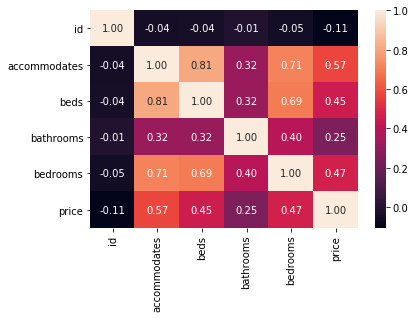

In [24]:
sns.heatmap(df_price_relation.corr(),annot = True,fmt = '.2f')

#### observation : i wanted to check the correlation between the price and the number of beds,bedrooms,bathrooms
- the there is a strong correlation between each of these variables and the price,


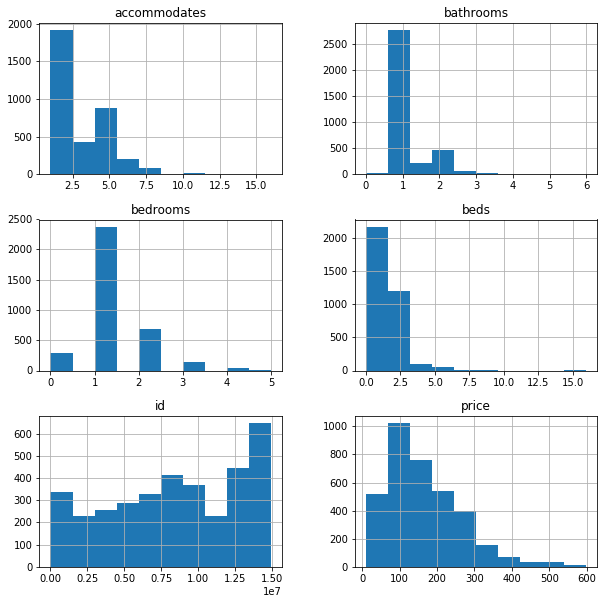

In [25]:
df_price_relation.hist(figsize=(10,10));

In [26]:
listings_df.query("price == 4000")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2285,12972378,https://www.airbnb.com/rooms/12972378,20160906204935,2016-09-07,Fenway Park/Kenmore Square Flat,"Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. wit...","Practicality, functionality, location, comfort","Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. wit...",none,"Kenmore Square/Fenway Park, Boston, Massachusetts",...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN


In [27]:
df_price_relation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3584
Data columns (total 6 columns):
id              3536 non-null int64
accommodates    3536 non-null int64
beds            3536 non-null float64
bathrooms       3536 non-null float64
bedrooms        3536 non-null float64
price           3536 non-null float64
dtypes: float64(4), int64(2)
memory usage: 193.4 KB


#### here i am exploring the the three datasets and how the relate to each other 
    - it goes one listing which HAS many reviews and many calendars(concerning availability)

In [28]:
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))
display(listings_df.query('id == "10333345"').T )
display(listings_df.query('id == "1178162"').T)

,2548
id,10333345
listing_url,https://www.airbnb.com/rooms/10333345
scrape_id,20160906204935
last_scraped,2016-09-07
name,Beautiful room in hipster town
summary,I'm having one room of my apartment for rent in Boston which is located in Allston/Brighton.The room is fu...
space,"This is a spacious room with a lot of thing in the room such as LCD 55 inches, disc player, wifi speaker, ..."
description,I'm having one room of my apartment for rent in Boston which is located in Allston/Brighton.The room is fu...
experiences_offered,none
neighborhood_overview,"Brighton is a dissolved municipality and current neighborhood of Boston, Massachusetts, United States,[1] ..."


,1559
id,1178162
listing_url,https://www.airbnb.com/rooms/1178162
scrape_id,20160906204935
last_scraped,2016-09-07
name,Private Room Great Location Boston
summary,NaN
space,Great Boston Location conveniently located near the Airport and Downtown Boston. - 6 minute walk to the su...
description,Great Boston Location conveniently located near the Airport and Downtown Boston. - 6 minute walk to the su...
experiences_offered,none
neighborhood_overview,NaN


In [29]:
pd.set_option('float_format', '{:f}'.format)
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,0.000000,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.000000,0.000000,3585.000000,2829.000000
mean,8440874.627615,20160906204935.851562,24923107.451046,58.902371,58.902371,nan,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,nan,nan,12.733891,1.970908
std,4500786.860725,0.851681,22927809.873801,171.119663,171.119663,nan,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,nan,nan,29.415076,2.120561
min,3353.000000,20160906204935.000000,4240.000000,0.000000,0.000000,nan,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,nan,nan,1.000000,0.010000
25%,4679319.000000,20160906204935.000000,6103425.000000,1.000000,1.000000,nan,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,nan,nan,1.000000,0.480000
50%,8577620.000000,20160906204935.000000,19280995.000000,2.000000,2.000000,nan,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,nan,nan,2.000000,1.170000
75%,12789527.000000,20160906204935.000000,36221474.000000,7.000000,7.000000,nan,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,nan,nan,6.000000,2.720000
max,14933461.000000,20160906204935.000000,93854106.000000,749.000000,749.000000,nan,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,nan,nan,136.000000,19.150000


In [30]:

listings_df.query('id == "10333345"').monthly_price

2548    NaN
Name: monthly_price, dtype: object

In [31]:
#there are more values beyond 5
reviews_df.query('listing_id == "10333345"').head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
45037,10333345,64248705,2016-03-01,57654487,Ajay,Sa was a great host. He made sure I had everything I needed and was good at making sure I was comfortable....
45038,10333345,64724642,2016-03-06,60421026,Bruce,Great room! I needed a place to sleep and it was as described. Great location! Nice neighborhood. Accommod...
45039,10333345,65421604,2016-03-13,60421026,Bruce,It was my second stay!
45040,10333345,67065535,2016-03-26,52721922,Jenny,Great
45041,10333345,68038117,2016-04-01,60421026,Bruce,Sa always makes me feel welcome. Great host. Great neighborhood. Great space.


In [32]:
calendar_df.query('listing_id == "10333345"').head()

,listing_id,date,available,price
930385,10333345,2017-07-28,True,80
930386,10333345,2017-07-27,True,80
930387,10333345,2017-07-26,True,80
930388,10333345,2017-07-25,True,80
930389,10333345,2017-07-24,True,80


#### modeling 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_squared_error

In [70]:
X = df_price_relation[['accommodates','beds','bedrooms']]
Y = df_price_relation[['price']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =.3 ,random_state = 42)

#instansiate
lm_model = LinearRegression(normalize = True)
#fit training


In [71]:
X_train.head()

,accommodates,beds,bedrooms
951,4,2.000000,2.000000
199,4,2.000000,2.000000
2720,8,4.000000,4.000000
3487,6,6.000000,4.000000
806,4,2.000000,2.000000


In [72]:
lm_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [73]:
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(Y_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.35675081454758484

### i also found that the number of beds was correlated with the number of accomodates
- so i decided to use a model to help me predict the number of accomodates to the beds

In [79]:
X = df_price_relation[['accommodates']]
Y = df_price_relation[['beds']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =.3 ,random_state = 42)

#instansiate
lm_model = LinearRegression(normalize = True)
#fit training
lm_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [80]:
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(Y_test, y_test_preds) # Rsquared here

# Print r2 to see result
r2_test

0.6449680730971368

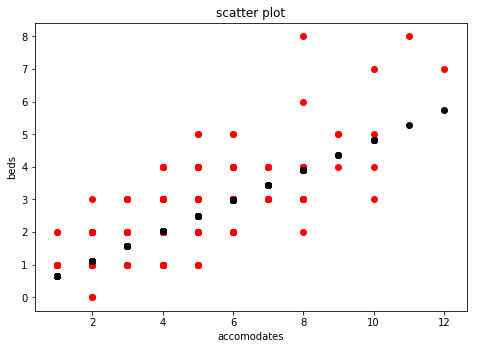

In [84]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X_test, Y_test, color='r')
ax.scatter(X_test, y_test_preds, color='black')
ax.set_xlabel('accomodates')
ax.set_ylabel('beds')
ax.set_title('scatter plot')
plt.show()

In [40]:
calendar_df[['price']] = calendar_df[['price']].astype(float)

In [41]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
listing_id    643037 non-null int64
date          643037 non-null datetime64[ns]
available     643037 non-null bool
price         643037 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 20.2 MB


In [42]:
calendar_df.head()

,listing_id,date,available,price
365,3075044,2017-08-22,True,65.000000
366,3075044,2017-08-21,True,65.000000
367,3075044,2017-08-20,True,65.000000
368,3075044,2017-08-19,True,75.000000
369,3075044,2017-08-18,True,75.000000


In [43]:
calendar_df.head()

,listing_id,date,available,price
365,3075044,2017-08-22,True,65.000000
366,3075044,2017-08-21,True,65.000000
367,3075044,2017-08-20,True,65.000000
368,3075044,2017-08-19,True,75.000000
369,3075044,2017-08-18,True,75.000000


#### i would like to track a couple of stuff 
       - see for correlation between certain dates and prices
       - correlation between availability and dates vs price
       
       

In [44]:
calendar_df['month_year'] =  calendar_df['date'].map(lambda x: 100*x.year + x.month)


In [45]:
calendar_df_2017 = calendar_df.query("date.dt.year == 2017")
calendar_df_2017.month_year.value_counts()


201701    63181
201702    56810
201708    55561
201703    55181
201707    54963
201705    53600
201706    52731
201704    51382
201709     8997
Name: month_year, dtype: int64

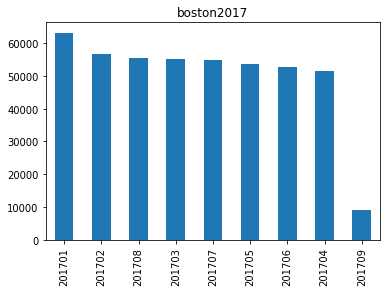

In [46]:
calendar_df_2017.query('date.dt.year == 2017').month_year.value_counts().plot.bar(title = 'boston2017');


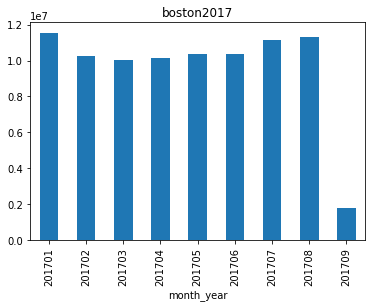

In [47]:
calendar_df_2017.groupby('month_year').price.sum().plot.bar(title = 'boston2017');


#### mean prices are equally distributed although we dont have many records of september but as the pattern goes its the same 
#### prices


In [48]:
#output negative means there are 1614 linstings which have a price less than 70 dollars
calendar_df_2017.query("month_year == 201709").query("price > 70").shape[0] - calendar_df_2017.query("month_year == 201709").shape[0] 


-1614

In [49]:
#output negative means there are 43541 linstings which have a price less than 70 dollars

calendar_df_2017.query("month_year == 201701").query("price > 70").shape[0] - calendar_df_2017.query("month_year == 201709").shape[0] 

43541

### September is the start of the working season and even though the demand in both 2017 and 2016 is quite low in this month the prices didnt really change that much,However it is hard to judge because there are not many records in september to begin with 
- concerning the availability in september i am quite sure since the plot of 2016 below shows there is the least amount of people in spetember also


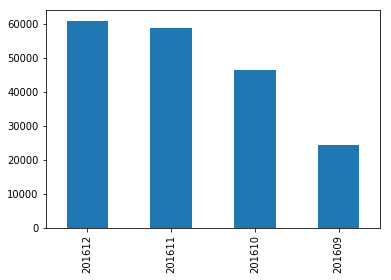

In [50]:
calendar_df.query("date.dt.year == 2016").month_year.value_counts().plot.bar()


# now to the last and final thing only two more questions 
    - a linear regression model between the dates and price would not be a good idea because 
    of september there will be tons of missclassified points
    - how is the dates in seattle data set when do people come i want to compare the two plots

In [85]:
calendar_s_df = pd.read_csv('../seattle/calendar.csv')

In [86]:
#testing
calendar_s_df.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [87]:
calendar_s_df[['date']] = pd.to_datetime(calendar_s_df.date)


In [88]:
calendar_s_df.dropna(inplace = True)

In [89]:
calendar_s_df['month_year'] =  calendar_s_df['date'].map(lambda x: 100*x.year + x.month)


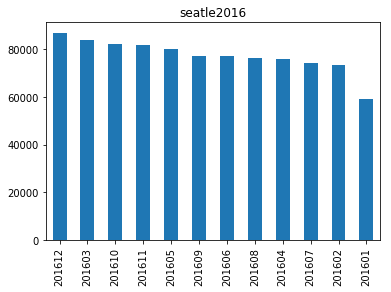

In [90]:
calendar_s_df.query('date.dt.year == 2016').month_year.value_counts().plot.bar(title = 'seatle2016')


Note: i only posted the answers to the questions i thought would be useful to the blog 